<a href="https://colab.research.google.com/github/Jinyu-Luo/CHL5230-Datathon1/blob/main/3_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHL5230 Datathon 1

## Introduction

In [1]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
# !pip install matplotlib seaborn
import seaborn as sns
import numpy as np

from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
# upload the data
from google.colab import files
uploaded = files.upload()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


The dataset consists of 23,535 observations with 10 pieces of information for each observation.

In [ ]:
# Get the shape of the dataframe
print(df.shape)

# List the columns of the dataframe
print(df.columns)

(23535, 10)
Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')


### Exploratory Data Analysis

#### Descriptive Statistics
Gain some insights into the statistical properties of the dataset.

In [ ]:
# Display summary statistics
print(df.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

#### Check Missing Values
As displayed below, there is no missing value in our dataset.

In [ ]:
print(df.isnull().sum())

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64


#### Features Examination

Below, by checking the uniqueness of entries, we found that data in `Fast_Food_Frequency` and `Screen_Time` are discrete.

In [4]:
import numpy as np
# Check categories in fast food frequency
sorted_freq = np.sort(df['Fast_Food_Frequency'].unique())
print("\nUnique values from the Fast_Food_Freqency colum:\n", sorted_freq)


Unique values from the Fast_Food_Freqency colum:
 [0 1 2 3 4]


In [5]:
# Check categories in screen time
sorted_screen_time = np.sort(df['Screen_Time'].unique())
print("\nUnique values from the Screen_Time colum:\n", sorted_screen_time)


Unique values from the Screen_Time colum:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]


#### Preprocess the Data
First, encode the categorical data. As observed above, "Gender" is the only categorical column, which comprises only two categories: Male and Female. Thus, we will encode the "Gender" column by assigning 1 to Male and 0 to Female.

In [ ]:
# Check categories in Gender column
print("\nUnique values from the Gender colum:\n", df['Gender'].unique())


Unique values from the Gender colum:
 ['Female' 'Male']


In [6]:
# Preprocess the data
# Encoding 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0

#### Outlier Detection
Detect noisy data using boxplots. Note that outliers are only found in the distribution of BMI but not other predictor variables. We see that the amount of outliers in BMI is quite a lot, so it is worth to have further analysis to identify some potential systematic causes.

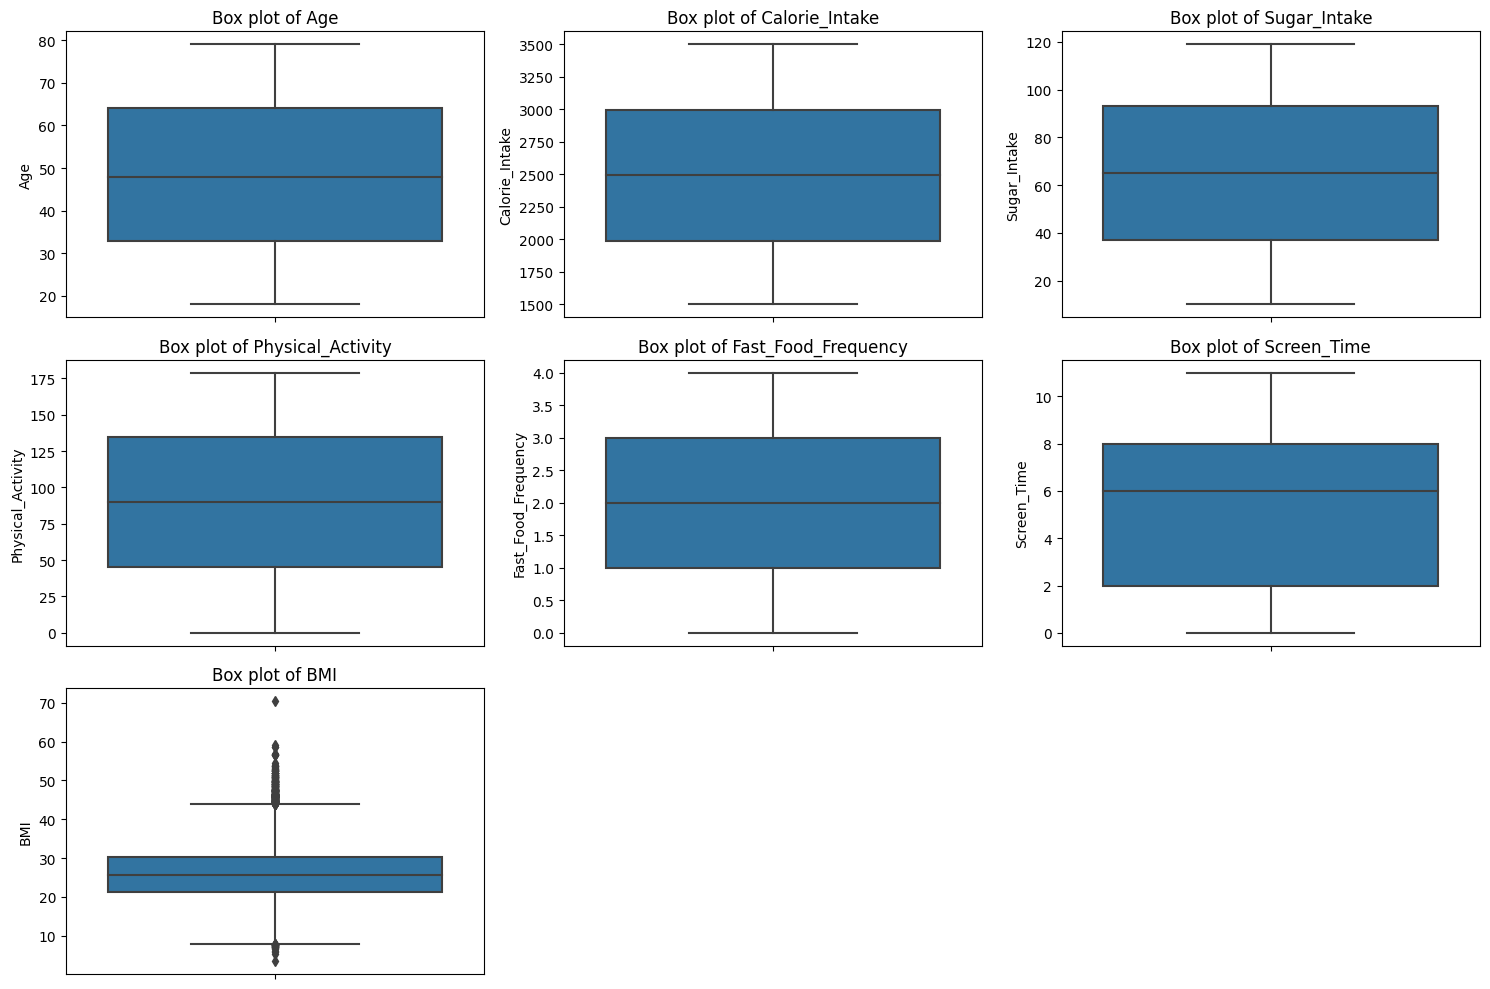

In [7]:
features = ['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
            'Fast_Food_Frequency', 'Screen_Time', 'BMI']

plt.figure(figsize = (15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust subplot dimensions based on the number of features
    sns.boxplot(y=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

By the histograms shown below, we can see that the right tail is longer than the left, meaning that there are more individuals with a BMI above the average than those below it. This phenomenon is consistent across genders. However, the female BMI distribution has slightly fatter tails and a sharper peak than the male distribution, suggesting that there are some more extreme values in the female BMI data compared to the male data. From the perspective of public health, these extreme values might represent unique cases or or some other implications, we decided to retain these data.

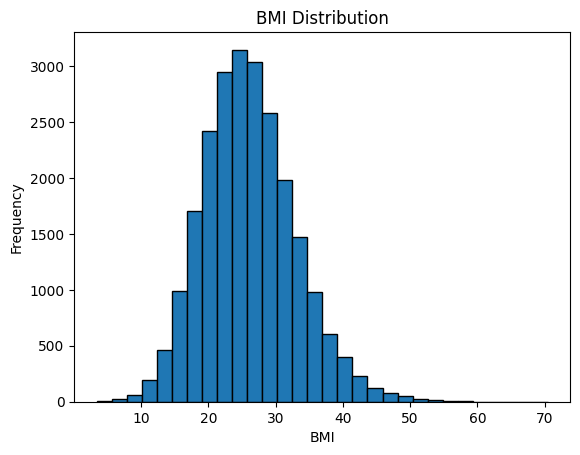

In [ ]:
plt.hist(df['BMI'], bins=30, edgecolor='k')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

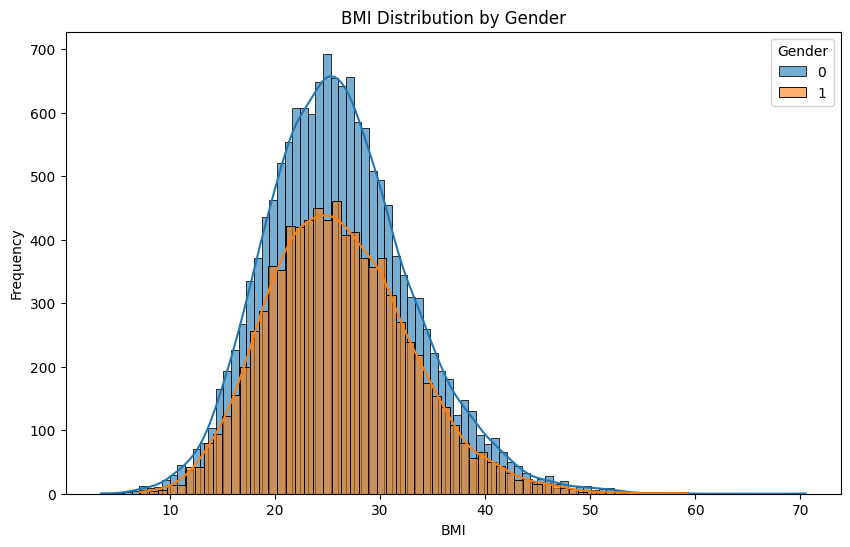

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    sns.histplot(subset['BMI'], label=gender, kde=True, alpha=0.6)

plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()

In [ ]:
from scipy.stats import kurtosis
print("\nSkewness:", df.groupby('Gender')['BMI'].skew())
print("Kurtosis:", df.groupby('Gender')['BMI'].apply(kurtosis))


Skewness: Gender
0    0.461210
1    0.450847
Name: BMI, dtype: float64
Kurtosis: Gender
0    0.561742
1    0.412364
Name: BMI, dtype: float64


#### Correlation Analysis

As shown below, all the correlations in this matrix are quite weak, suggesting that there is no strong linear relationships between these variables. It could be the case that other variables not included in this dataset might have more significant impact on BMI.

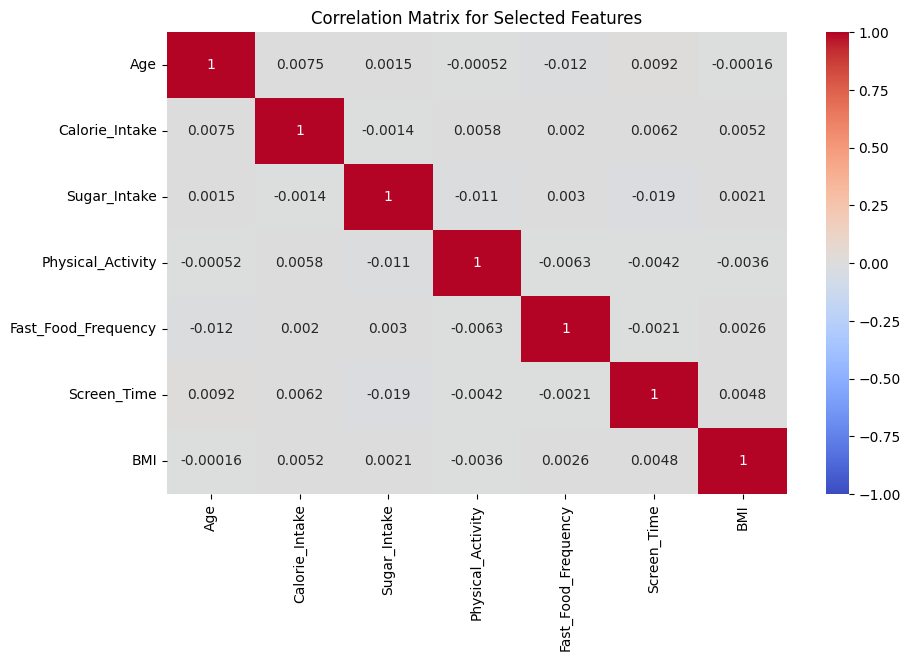

In [8]:
# Compute the correlation matrix for the selected features
correlation_matrix = df[features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Features')
plt.show()

## Data Engineering

### Data Preparation

#### Create Variable for the Six BMI Levels

In [9]:
# Add 'weight_status' column based on BMI
def health_status_classifier(bmi):
  if bmi < 18.5:
    return '0' # Underweight
  elif 18.5 <= bmi < 25:
    return '1' # Normal
  elif 25 <= bmi < 30:
    return '2' # preobesity
  elif 30 <= bmi < 35:
    return '3' # Obesity class 1
  elif 35 <= bmi < 40:
    return '4' # Obesity class 2
  else:
    return '5' # Obesity class 3

df['bmi_level'] = df['BMI'].apply(health_status_classifier)
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,bmi_level
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,3
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,2
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,2
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,5
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,2


Check the distribution of data according to BMI categories.

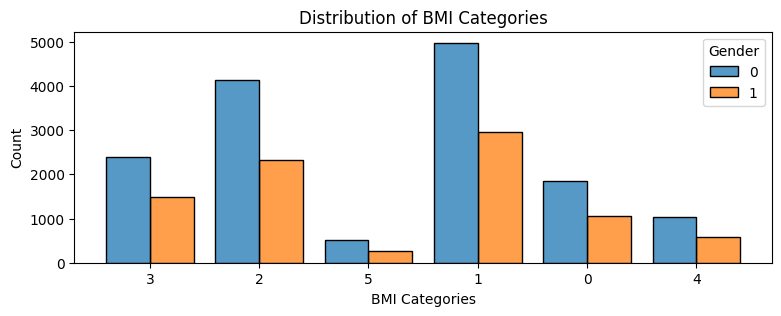

In [ ]:
# Plot for the distribution of BMI Categories against gender
plt.figure(figsize=(9,3))
sns.histplot(data = df, x = "bmi_level", hue = "Gender",
             multiple = "dodge", shrink = .8)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Categories')
plt.ylabel("Count")
plt.show()

Observed that
*   The proportion of people fall into the category 0 ('underweight') is only half of the other categories regardless of gender. This suggests that random train-test split might result in very different data distributions in the training and test sets. To address this issue, we will split the data with stratification on BMI categories.
*   The category 1 (the normal group) takes the largest share.


Since BMI is calculated based on height and weight and we have categorized people into different BMI categories, we will remove height, weight, and BMI from the dataframe for the following analysis.

### Classification for 6 BMI levels

#### Train-Test Data split

Class imbalance is addressed using the Synthetic Minority Oversampling Technique (SMOTE). This method generates synthetic samples for the minority class. It does so by selecting a sample and its nearest neighbor, computing the difference between them, and then creating a new point that lies between these two existing points. The prediction precision for the minority class was improved from 0% to 10% by SMOTE, although the overall performance remains quite poor.

In [10]:
data = df # copy the dataset to avoid changing the original
X = data[["Age",'Gender',"Calorie_Intake","Sugar_Intake","Physical_Activity",
          'Fast_Food_Frequency']]
y = data['bmi_level']

# Check the distribution of y
print(y.value_counts())

# Split data into training and testing sets stratified by the BMI levels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y,
                                                    random_state=42)
# Apply SMOTE on the training data set only
smote = SMOTE(random_state = 42)
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smt)
X_test_scaled = scaler.transform(X_test)

1    7922
2    6444
3    3868
0    2913
4    1615
5     773
Name: bmi_level, dtype: int64


##### KNN
Elbow was first employed to determine optimal parameters for k. However, it was difficult to determine the optimal paramater given the graph displayed a downward trend without any 'bend'. Therefore, grid-search was employed to find the optimal hyperparameters, such as *k* for nearest neighbors. The idea behind Grid-search involves iterating through every parameter combination, recording the prediction results for each, and ultimately choosing the parameter set that yields the most accurate prediction result.

In [12]:
# Elbow Method

# split data into features and labels
X = df[["Age","Gender","Calorie_Intake","Sugar_Intake","Physical_Activity",'Fast_Food_Frequency','Screen_Time']]
y = df["bmi_level"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Choose a range of k values to test
k_values = range(1, 20)

# A list to keep track of the error rates for each k value.
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

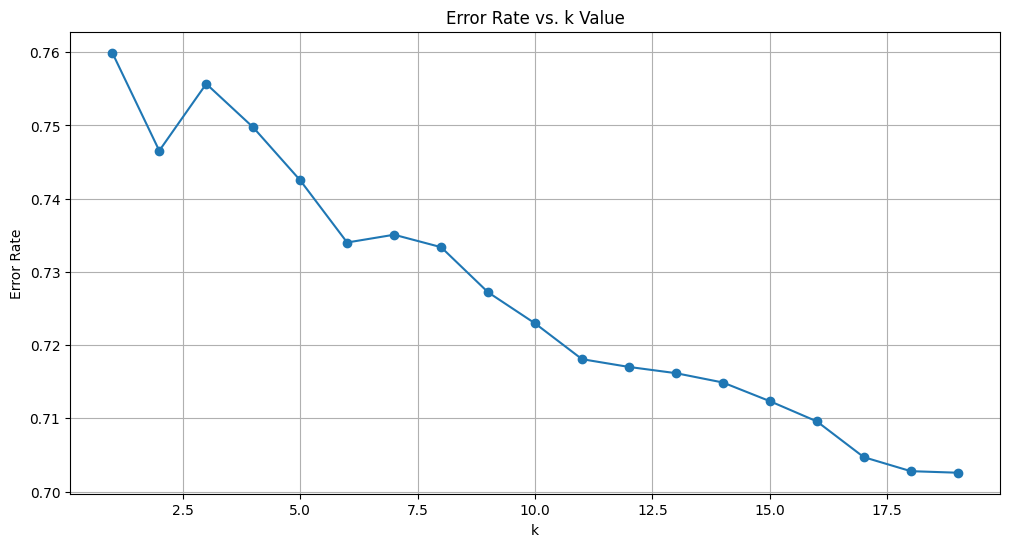

In [13]:

# Plotting relationship between k value and error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Hyperparameters to tune
param_grid = {
    'n_neighbors': [5, 10, 20, 30, 40, 50, 75, 100], # number of neighbors
    'weights': ['uniform', 'distance'], # weight function used for prediction
    'metric': ['euclidean', 'manhattan'], # distance matric
}

# K-Fold Cross Validation
stratified_kfold = StratifiedKFold(n_splits = 5,
                                   shuffle = True,
                                   random_state = 42)

# Use GridSearchCV to find the best hyperparameters
knn_grid_search = GridSearchCV(estimator = knn,
                               param_grid = param_grid,
                               cv = 3, n_jobs = -1, verbose = 2,
                               scoring = 'accuracy')
knn_grid_search.fit(X_train_scaled, y_train_smt)

print("Best Parameters: ", knn_grid_search.best_params_)

# predictions
y_pred = knn_grid_search.best_estimator_.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.14      0.13       582
           1       0.33      0.21      0.26      1584
           2       0.26      0.18      0.22      1289
           3       0.16      0.16      0.16       774
           4       0.08      0.18      0.11       323
           5       0.04      0.15      0.06       155

    accuracy                           0.18      4707
   macro avg       0.16      0.17      0.16      4707
weighted avg       0.23      0.18      0.20      4707



**Cross-Validation**

In [ ]:
best_knn = knn_grid_search.best_estimator_
scores = cross_val_score(best_knn, X_test_scaled, y_test,
                         cv = stratified_kfold, scoring = "accuracy")
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-validation scores: [0.25690021 0.27176221 0.26673751 0.23698193 0.26036132]
Mean CV Accuracy: 0.25854863710512604
Standard Deviation: 0.011939698019839717


**Visualize the Confusion Matrix**

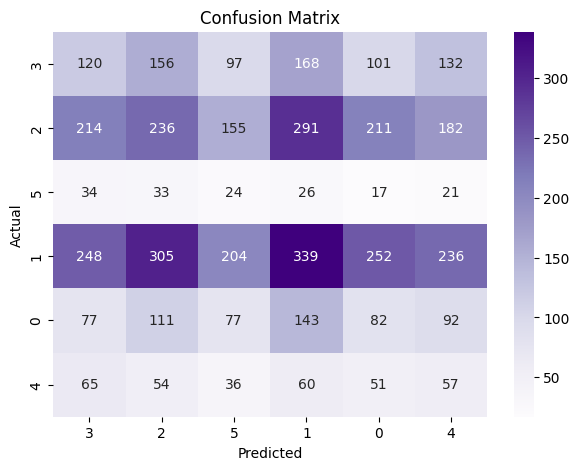

In [ ]:
# Get the name of BMI levels
classes = df['bmi_level'].unique()

# plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred,
                             labels=classes),
            cmap='Purples', annot=True, fmt='g',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Decision Tree

Given the unsatisfactory results from KNN, a Decision Tree model was chosen. In contrast to KNN, the Decision Tree is a structured and hierarchical method that makes decisions based on explicit rules. It can automatically highlight significant variables and their interactions, providing a clearer understanding of the decision-making process. With our dataset, a decision tree can discern patterns linked to each gender without requiring separate models. If gender is influential in determining BMI levels, the tree will use it as a primary decision node. Using a single decision tree for the entire dataset is not only computationally efficient but also ensures that any interaction between gender and other features is captured effectively.  

In [ ]:
# Extract feature and target columns
X = data[["Age",'Gender',"Calorie_Intake","Sugar_Intake","Physical_Activity",
          'Fast_Food_Frequency']]
y = data['bmi_level']

# Get feature and target names
feature_name = list(X.columns)
target_name = df['bmi_level'].unique().tolist()

# Initialize an oversampler
ros = RandomOverSampler(random_state = 42)

# Apply the oversampler to the dataset to balance the classes
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size = 0.2,
                                                    random_state = 5230)

# Initialize a decision tree classifier
clf = dtc(max_features = 5)

# Train the data with deciision tree
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=target_name))

              precision    recall  f1-score   support

           3       0.77      0.90      0.83      1537
           2       0.46      0.30      0.36      1553
           5       0.56      0.46      0.50      1592
           1       0.73      0.79      0.76      1680
           0       0.85      0.99      0.91      1614
           4       0.91      1.00      0.95      1531

    accuracy                           0.74      9507
   macro avg       0.71      0.74      0.72      9507
weighted avg       0.71      0.74      0.72      9507



### Binary Classification for Obesity with KNN

Since the population is evenly distributed into the two classes, there is no need to perform oversampling. Therefore, we remove SMOTE here.

#### Create Binary Variable for Obesity
A BMI value that is greater than or equal to 25 will be labeled as "1", meaning overweight or high risk obesity. A BMI value that is less than 25 will be labeled as "0", meaning normal in weight or underweight.  

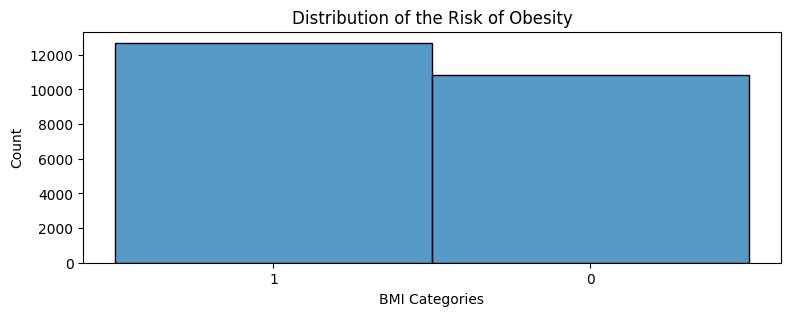

In [ ]:
# looking at distribution of obesity risk
plt.figure(figsize=(9,3))
sns.histplot(df["obesity"], bins = 2, kde=False)
plt.title('Distribution of the Risk of Obesity')
plt.xlabel('BMI Categories')
plt.ylabel("Count")
plt.show()

In [ ]:
def obesity(bmi):
  if bmi < 25:
    return '0' # underweight and normal
  else:
    return '1' # obese/overwight, high risk

df['obesity'] = df['BMI'].apply(obesity)
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,bmi_level,obesity
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,3,1
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,2,1
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,2,1
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,5,1
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,2,1


In [ ]:
# split the data into features and label
X = data[["Age",'Gender',"Calorie_Intake","Sugar_Intake","Physical_Activity",
          'Fast_Food_Frequency']]
y = data['obesity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=100)  # Setting K to 5 as an example

# Hyperparameters to tune
param_grid = {
    'n_neighbors': [5, 10, 20, 30, 40, 50, 75, 100], # number of neighbors
    'weights': ['uniform', 'distance'], # weight function used for prediction
    'metric': ['euclidean', 'manhattan'], # distance matric
}

# Use GridSearchCV to find the best hyperparameters
knn_grid_search = GridSearchCV(estimator = knn,
                               param_grid = param_grid,
                               cv = 3, n_jobs = -1, verbose = 2,
                               scoring = 'accuracy')

# Train and predict the male data
knn_grid_search.fit(X_train_scaled, y_train)
print("Best Parameters: ", knn_grid_search.best_params_)
y_pred = knn_grid_search.best_estimator_.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 75, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.25      0.33      2175
           1       0.54      0.75      0.63      2532

    accuracy                           0.52      4707
   macro avg       0.50      0.50      0.48      4707
weighted avg       0.51      0.52      0.49      4707



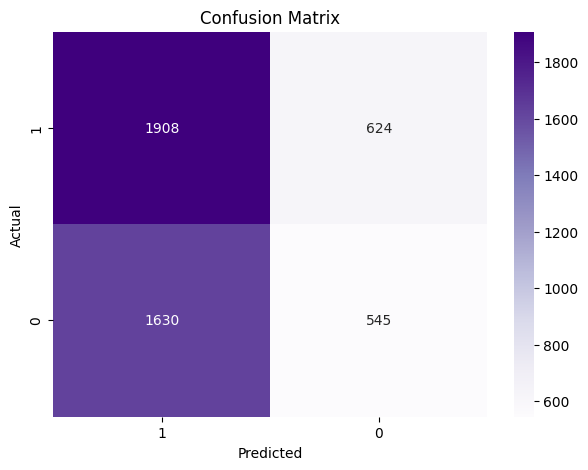

In [ ]:
# Visualization of Confusion Matrix Heatmap

# Get unique classes
classes = data["obesity"].unique()

# plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes),
            cmap='Purples', annot=True, fmt='g',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Appendix

Decision Tree Visualization

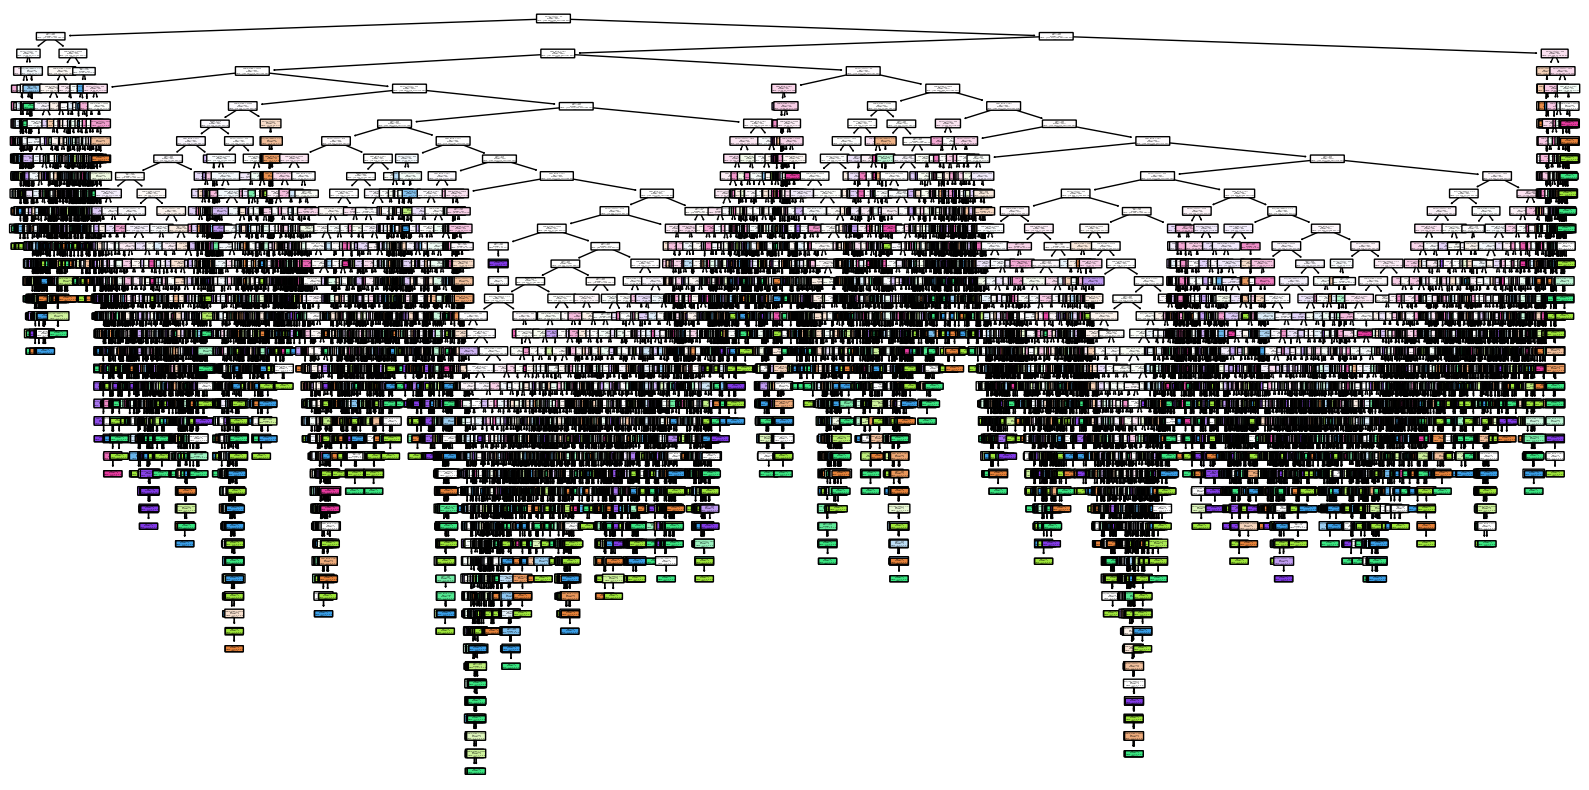

In [ ]:
# Import necessary library for visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=target_name,
          feature_names=feature_name)
plt.show()